# XGBoost models for 1, 3, 5 and 10 time windows ** with common count hes files

## Libraries

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, f1_score, recall_score, precision_score, roc_curve
from sklearn.utils import resample

import xgboost as xgb
from xgboost import plot_importance

## Directory

In [2]:
os.chdir("/rds/general/project/hda_students_data/live/Group9/General/Data/Final_final_final_datasets")

## Load in data

In [54]:
data_train = pd.read_csv("train_data_pca.csv")
data_test = pd.read_csv("test_data_pca.csv")

In [55]:
hes_1yr = pd.read_csv("../1_3_5_10_hes_common/hes_1yr_hes_count.csv")
hes_3yr = pd.read_csv("../1_3_5_10_hes_common/hes_3yr_hes_count.csv")
hes_5yr = pd.read_csv("../1_3_5_10_hes_common/hes_5yr_hes_count.csv")
hes_10yr = pd.read_csv("../1_3_5_10_hes_common/hes_10yr_hes_count.csv")

In [56]:
print(data_train.shape)
print(data_test.shape)
print(hes_1yr.shape)
print(hes_3yr.shape)
print(hes_5yr.shape)
print(hes_10yr.shape)

(11517, 380)
(3839, 380)
(15356, 193)
(15356, 324)
(15356, 399)
(15356, 498)


In [57]:
hes_1yr = hes_1yr.drop(["X21003.0.0", "X31.0.0", "casecont", "triplet_id"], axis = 1)
data_1yr_train = data_train.merge(hes_1yr, on = "eid", how = "left")
data_1yr_test = data_test.merge(hes_1yr, on = "eid", how = "left")

In [58]:
data_1yr_train.to_csv("train_1yr_count_hesin_pca.csv")
data_1yr_test.to_csv("test_1yr_coount_hesin_pca.csv")

In [59]:
hes_3yr = hes_3yr.drop(["X21003.0.0", "X31.0.0", "casecont", "triplet_id"], axis = 1)
data_3yr_train = data_train.merge(hes_3yr, on = "eid", how = "left")
data_3yr_test = data_test.merge(hes_3yr, on = "eid", how = "left")

In [60]:
data_3yr_train.to_csv("train_3yr_count_hesin_pca.csv")
data_3yr_test.to_csv("test_3yr_count_hesin_pca.csv")

In [61]:
hes_5yr = hes_5yr.drop(["X21003.0.0", "X31.0.0", "casecont", "triplet_id"], axis = 1)
data_5yr_train = data_train.merge(hes_5yr, on = "eid", how = "left")
data_5yr_test = data_test.merge(hes_5yr, on = "eid", how = "left")

In [62]:
data_5yr_train.to_csv("train_5yr_count_hesin_pca.csv")
data_5yr_test.to_csv("test_5yr_count_hesin_pca.csv")

In [63]:
hes_10yr = hes_10yr.drop(["X21003.0.0", "X31.0.0", "casecont", "triplet_id"], axis = 1)
data_10yr_train = data_train.merge(hes_10yr, on = "eid", how = "left")
data_10yr_test = data_test.merge(hes_10yr, on = "eid", how = "left")

In [64]:
data_10yr_train.to_csv("train_10yr_count_hesin_pca.csv")
data_10yr_test.to_csv("test_10yr_count_hesin_pca.csv")

#### Check shapes

In [65]:
print(data_1yr_train.shape)
print(data_1yr_test.shape)

print(data_3yr_train.shape)
print(data_3yr_test.shape)

print(data_5yr_train.shape)
print(data_5yr_test.shape)

print(data_10yr_train.shape)
print(data_10yr_test.shape)

(11517, 568)
(3839, 568)
(11517, 699)
(3839, 699)
(11517, 774)
(3839, 774)
(11517, 873)
(3839, 873)


## Balance training datasets

In [85]:
print(data_1yr_train["casecont"].value_counts())
print(data_3yr_train["casecont"].value_counts())
print(data_5yr_train["casecont"].value_counts())
print(data_10yr_train["casecont"].value_counts())

0    7657
1    3860
Name: casecont, dtype: int64
0    7657
1    3860
Name: casecont, dtype: int64
0    7657
1    3860
Name: casecont, dtype: int64
0    7657
1    3860
Name: casecont, dtype: int64


In [86]:
data_1yr_train_maj = data_1yr_train[data_1yr_train["casecont"] == 0]
data_1yr_train_min = data_1yr_train[data_1yr_train["casecont"] == 1]

data_1yr_train_min_upsampled = resample(data_1yr_train_min, replace = True, n_samples = 7657, random_state = 289)

data_1yr_train = pd.concat([data_1yr_train_maj, data_1yr_train_min_upsampled])

In [87]:
data_3yr_train_maj = data_3yr_train[data_3yr_train["casecont"] == 0]
data_3yr_train_min = data_3yr_train[data_3yr_train["casecont"] == 1]

data_3yr_train_min_upsampled = resample(data_3yr_train_min, replace = True, n_samples = 7657, random_state = 289)

data_3yr_train = pd.concat([data_3yr_train_maj, data_3yr_train_min_upsampled])

In [88]:
data_5yr_train_maj = data_5yr_train[data_5yr_train["casecont"] == 0]
data_5yr_train_min = data_5yr_train[data_5yr_train["casecont"] == 1]

data_5yr_train_min_upsampled = resample(data_5yr_train_min, replace = True, n_samples = 7657, random_state = 289)

data_5yr_train = pd.concat([data_5yr_train_maj, data_5yr_train_min_upsampled])

In [89]:
data_10yr_train_maj = data_10yr_train[data_10yr_train["casecont"] == 0]
data_10yr_train_min = data_10yr_train[data_10yr_train["casecont"] == 1]

data_10yr_train_min_upsampled = resample(data_10yr_train_min, replace = True, n_samples = 7657, random_state = 289)

data_10yr_train = pd.concat([data_10yr_train_maj, data_10yr_train_min_upsampled])

In [90]:
print(data_1yr_train["casecont"].value_counts())
print(data_3yr_train["casecont"].value_counts())
print(data_5yr_train["casecont"].value_counts())
print(data_10yr_train["casecont"].value_counts())

1    7657
0    7657
Name: casecont, dtype: int64
1    7657
0    7657
Name: casecont, dtype: int64
1    7657
0    7657
Name: casecont, dtype: int64
1    7657
0    7657
Name: casecont, dtype: int64


## Create X and Y

In [67]:
data_1yr_train

,Unnamed: 0,eid,X21022.0.0,X31.0.0.y,casecont,0,1,2,3,4,...,Z88,Z90,Z91,Z92,Z93,Z94,Z95,Z96,Z98,Z99
0,1,1000027,66,1,0,-3.191095,-0.677469,0.311401,0.500885,2.155006,...,0,0,0,0,0,0,0,0,0,0
1,2,1000039,69,1,0,-0.387576,-1.836874,-2.018984,1.149321,-1.141178,...,0,0,0,0,0,0,0,0,0,0
2,3,1000040,50,0,0,1.294949,-4.484496,-0.837069,1.851994,1.368840,...,0,0,0,0,0,0,0,0,0,0
3,4,1000053,46,1,0,-0.002175,10.232414,-4.838340,6.001560,-1.119284,...,0,0,0,0,0,0,0,0,0,0
4,5,1000064,52,0,0,1.058770,-1.506609,0.428277,1.998242,-1.711726,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11512,15818,6020344,59,1,1,-3.573450,2.300652,-0.051064,-3.162977,-0.215779,...,0,0,0,0,0,0,0,0,0,0
11513,15819,6021467,66,0,1,0.969796,-1.106059,0.843320,-0.274984,0.690744,...,0,0,0,0,0,0,0,0,0,0
11514,15822,6024045,46,1,1,-3.480296,0.380973,-0.792657,1.097781,3.253055,...,0,0,0,0,0,0,0,0,0,0
11515,15823,6024809,65,1,1,-0.931638,2.777366,5.394316,-4.818079,-0.046142,...,0,0,0,0,0,0,0,0,0,0


In [91]:
X_train_1yr = data_1yr_train.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_train_1yr = data_1yr_train["casecont"]

X_test_1yr = data_1yr_test.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_test_1yr = data_1yr_test["casecont"]

X_train_3yr = data_3yr_train.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_train_3yr = data_3yr_train["casecont"]

X_test_3yr = data_3yr_test.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_test_3yr = data_3yr_test["casecont"]

X_train_5yr = data_5yr_train.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_train_5yr = data_5yr_train["casecont"]

X_test_5yr = data_5yr_test.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_test_5yr = data_5yr_test["casecont"]

X_train_10yr = data_10yr_train.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_train_10yr = data_10yr_train["casecont"]

X_test_10yr = data_10yr_test.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_test_10yr = data_10yr_test["casecont"]

In [92]:
print(X_train_1yr.shape)
print(Y_train_1yr.shape) 

print(X_test_1yr.shape)
print(Y_test_1yr.shape) 

print(X_train_3yr.shape)
print(Y_train_3yr.shape) 

print(X_test_3yr.shape)
print(Y_test_3yr.shape) 

print(X_train_5yr.shape)
print(Y_train_5yr.shape) 

print(X_test_5yr.shape)
print(Y_test_5yr.shape) 

print(X_train_10yr.shape)
print(Y_train_10yr.shape) 

print(X_test_10yr.shape)
print(Y_test_10yr.shape) 

(15314, 565)
(15314,)
(3839, 565)
(3839,)
(15314, 696)
(15314,)
(3839, 696)
(3839,)
(15314, 771)
(15314,)
(3839, 771)
(3839,)
(15314, 870)
(15314,)
(3839, 870)
(3839,)


In [116]:
X_test_1yr.head()

,X21022.0.0,X31.0.0.y,0,1,2,3,4,5,6,7,...,Z88,Z90,Z91,Z92,Z93,Z94,Z95,Z96,Z98,Z99
0,65,1,-3.032887,-1.668018,0.618267,-1.102886,0.645902,-1.550361,-0.568101,-0.798112,...,0,0,0,0,0,0,0,0,0,0
1,63,0,4.561033,-3.569321,0.683186,-1.539499,1.854227,1.237379,0.131157,0.085243,...,0,0,0,0,0,0,0,0,0,0
2,63,0,2.192140,-4.201005,-1.036323,-1.046009,2.423900,2.434880,-1.108511,0.459309,...,0,0,0,0,0,0,0,0,0,0
3,46,1,-2.932891,-1.388148,-0.892360,-0.732510,-1.924474,-0.806001,1.898540,3.431544,...,0,0,0,0,0,0,0,0,0,0
4,63,1,-1.804552,0.943959,-1.774790,0.478925,2.809788,-1.339151,0.217313,0.525271,...,0,0,0,0,0,0,0,0,0,0


## XGBoost Models

#### Baseline models

In [207]:
eval_set = [(X_test_1yr, Y_test_1yr)]

model_1yr = xgb.XGBClassifier(learning_rate = 0.05, max_depth = 3, min_child_weight = 6, subsample = 0.5)
model_1yr.fit(X_train_1yr, Y_train_1yr, eval_metric = "auc", eval_set = eval_set, verbose = True)

[0]	validation_0-auc:0.50142
[1]	validation_0-auc:0.50747
[2]	validation_0-auc:0.51701
[3]	validation_0-auc:0.51638
[4]	validation_0-auc:0.51626
[5]	validation_0-auc:0.52221
[6]	validation_0-auc:0.51589
[7]	validation_0-auc:0.51603
[8]	validation_0-auc:0.51676
[9]	validation_0-auc:0.56638
[10]	validation_0-auc:0.57158
[11]	validation_0-auc:0.57044
[12]	validation_0-auc:0.57007
[13]	validation_0-auc:0.57008
[14]	validation_0-auc:0.56965
[15]	validation_0-auc:0.57093
[16]	validation_0-auc:0.56938
[17]	validation_0-auc:0.57018
[18]	validation_0-auc:0.56946
[19]	validation_0-auc:0.56972
[20]	validation_0-auc:0.56934
[21]	validation_0-auc:0.57464
[22]	validation_0-auc:0.57468
[23]	validation_0-auc:0.58200
[24]	validation_0-auc:0.58165
[25]	validation_0-auc:0.58162
[26]	validation_0-auc:0.58188
[27]	validation_0-auc:0.58213
[28]	validation_0-auc:0.59447
[29]	validation_0-auc:0.59437
[30]	validation_0-auc:0.60422
[31]	validation_0-auc:0.60684
[32]	validation_0-auc:0.60632
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [208]:
train_score = round(model_1yr.score(X_train_1yr, Y_train_1yr), 5)
test_score = round(model_1yr.score(X_test_1yr, Y_test_1yr), 5)

print(f"Training accuracy => {train_score}")
print(f"Testing accuracy => {test_score}")

Training accuracy => 0.76342
Testing accuracy => 0.68351


In [176]:
model_3yr = xgb.XGBClassifier(learning_rate = 0.05, max_depth = 3, min_child_weight = 6, subsample = 0.5)
model_3yr.fit(X_train_3yr, Y_train_3yr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [177]:
train_score = round(model_3yr.score(X_train_3yr, Y_train_3yr), 5)
test_score = round(model_3yr.score(X_test_3yr, Y_test_3yr), 5)

print(f"Training accuracy => {train_score}")
print(f"Testing accuracy => {test_score}")

Training accuracy => 0.76407
Testing accuracy => 0.68299


In [178]:
model_5yr = xgb.XGBClassifier(learning_rate = 0.05, max_depth = 3, min_child_weight = 6, subsample = 0.5)
model_5yr.fit(X_train_5yr, Y_train_5yr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [179]:
train_score = round(model_5yr.score(X_train_5yr, Y_train_5yr), 5)
test_score = round(model_5yr.score(X_test_5yr, Y_test_5yr), 5)

print(f"Training accuracy => {train_score}")
print(f"Testing accuracy => {test_score}")

Training accuracy => 0.76192
Testing accuracy => 0.67778


In [180]:
model_10yr = xgb.XGBClassifier(learning_rate = 0.05, max_depth = 3, min_child_weight = 6, subsample = 0.5)
model_10yr.fit(X_train_10yr, Y_train_10yr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [181]:
train_score = round(model_10yr.score(X_train_10yr, Y_train_10yr), 5)
test_score = round(model_10yr.score(X_test_10yr, Y_test_10yr), 5)

print(f"Training accuracy => {train_score}")
print(f"Testing accuracy => {test_score}")

Training accuracy => 0.76094
Testing accuracy => 0.68273


## Plot the ROC curves

#### This is the code to build the roc curve plot, will need more results obviously, but shouldn't take too long to extend this code!

In [209]:
result_table = pd.DataFrame(columns=['Time window', 'fpr','tpr','auc'])

In [210]:
yproba = model_1yr.predict_proba(X_test_1yr)[::,1]
fpr, tpr, _ = roc_curve(Y_test_1yr,  yproba)
auc = roc_auc_score(Y_test_1yr, yproba)

result_table = result_table.append({'Time window':"1 year",
                                    'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [211]:
yproba = model_3yr.predict_proba(X_test_3yr)[::,1]
fpr, tpr, _ = roc_curve(Y_test_3yr,  yproba)
auc = roc_auc_score(Y_test_3yr, yproba)

result_table = result_table.append({'Time window':"3 years",
                                    'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [212]:
yproba = model_5yr.predict_proba(X_test_5yr)[::,1]
fpr, tpr, _ = roc_curve(Y_test_5yr,  yproba)
auc = roc_auc_score(Y_test_5yr, yproba)

result_table = result_table.append({'Time window':"5 years",
                                    'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [213]:
yproba = model_10yr.predict_proba(X_test_10yr)[::,1]
fpr, tpr, _ = roc_curve(Y_test_10yr,  yproba)
auc = roc_auc_score(Y_test_10yr, yproba)

result_table = result_table.append({'Time window':"10 years",
                                    'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

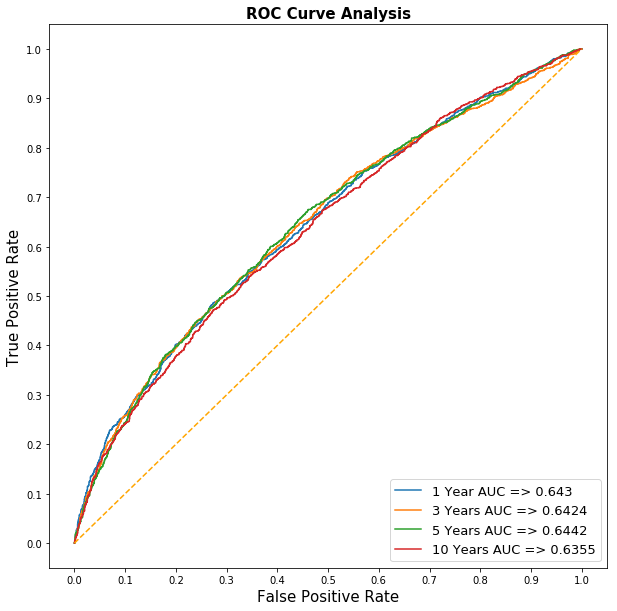

In [214]:
plt.rcParams["figure.figsize"] = (10,10)

plt.plot(result_table.fpr[0], result_table.tpr[0], label="1 Year AUC => " + str(round(result_table.auc[0], 4)))
plt.plot(result_table.fpr[1], result_table.tpr[1], label="3 Years AUC => " + str(round(result_table.auc[1], 4)))
plt.plot(result_table.fpr[2], result_table.tpr[2], label="5 Years AUC => " + str(round(result_table.auc[2], 4)))
plt.plot(result_table.fpr[3], result_table.tpr[3], label="10 Years AUC => " + str(round(result_table.auc[3], 4)))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

## Extract important features

#### 1 Year

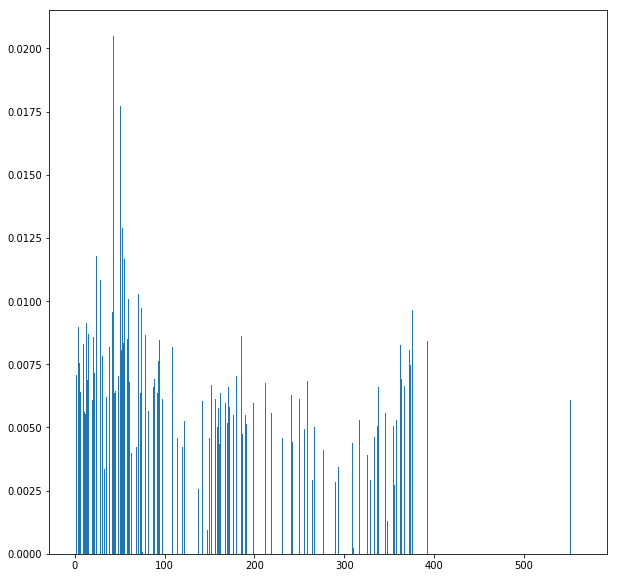

In [215]:
plt.bar(range(len(model_1yr.feature_importances_)), model_1yr.feature_importances_)
plt.show()

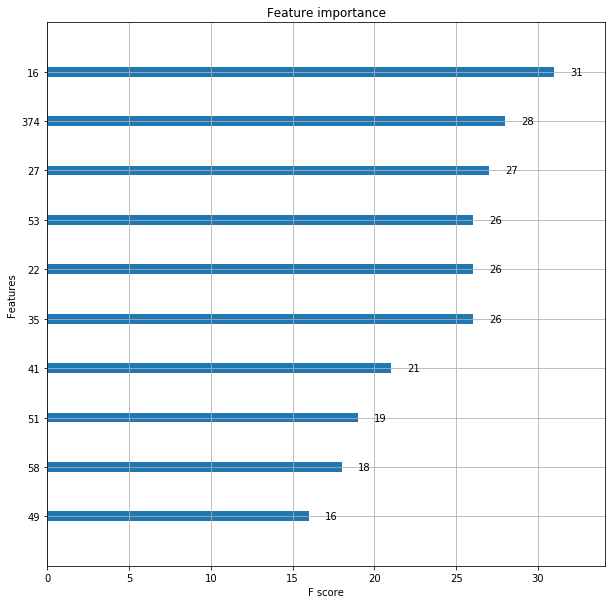

In [216]:
plot_importance(model_1yr, max_num_features=10)
plt.show()

#### 3 Years

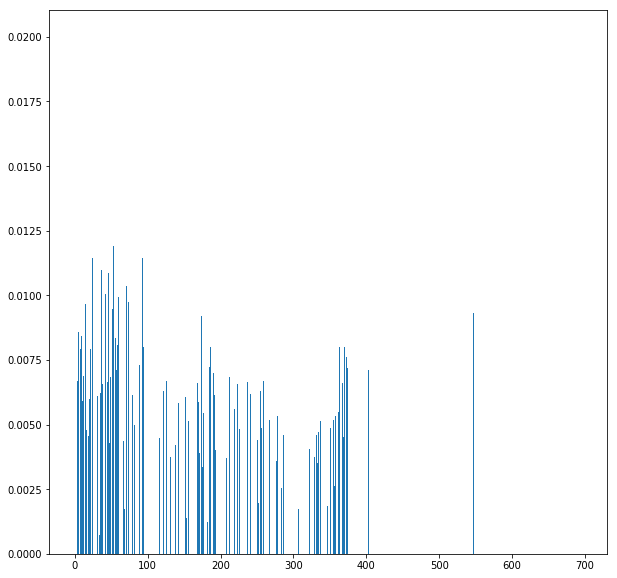

In [217]:
plt.bar(range(len(model_3yr.feature_importances_)), model_3yr.feature_importances_)
plt.show()

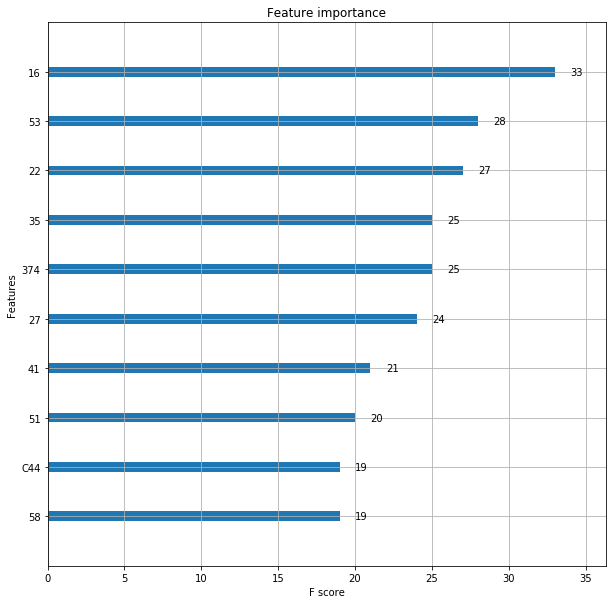

In [218]:
plot_importance(model_3yr, max_num_features=10)
plt.show()

#### 5 Years

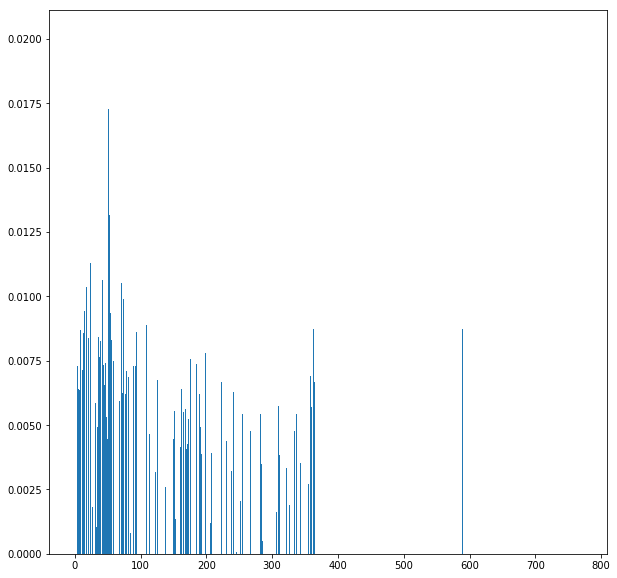

In [219]:
plt.bar(range(len(model_5yr.feature_importances_)), model_5yr.feature_importances_)
plt.show()

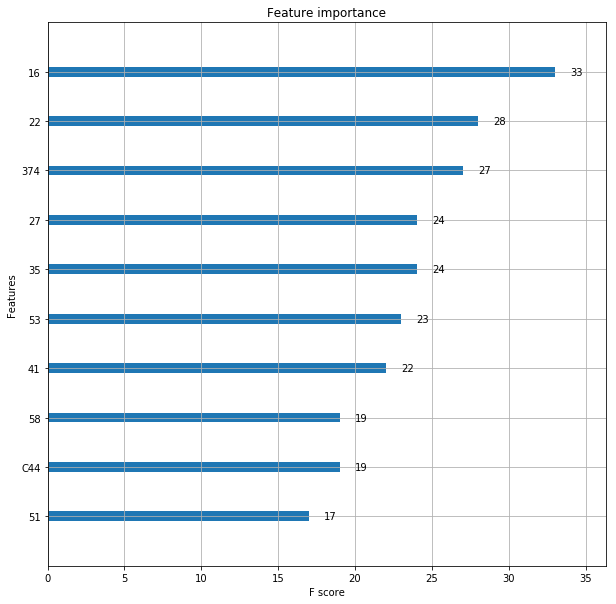

In [220]:
plot_importance(model_5yr, max_num_features=10)
plt.show()

#### 10 Years

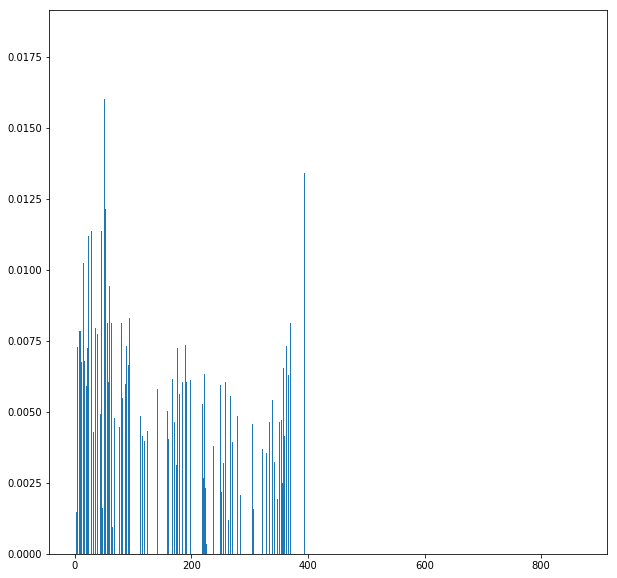

In [221]:
plt.bar(range(len(model_10yr.feature_importances_)), model_10yr.feature_importances_)
plt.show()

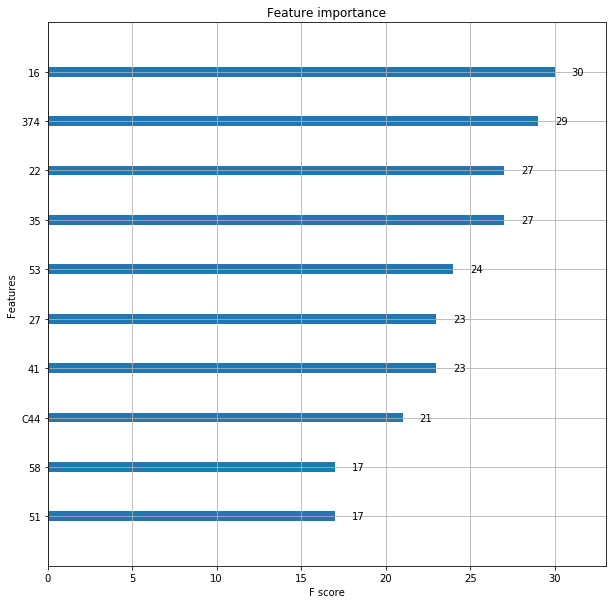

In [222]:
plot_importance(model_10yr, max_num_features=10)
plt.show()